In [1]:
### Code From https://www.tutorialspoint.com/artificial_intelligence_with_python/
###artificial_intelligence_with_python_speech_recognition.htm 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


In [2]:
frequency_sampling, audio_signal = wavfile.read("harvard.wav")

C:\Users\Krishna\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [51]:
print(audio_signal)

[-0.21545456  0.46592985  0.92707287  0.94999579  0.52386313 -0.14989554
 -0.75279976 -0.99986141 -0.7742964  -0.18272753  0.49521521  0.9390736
  0.93903924  0.49512837 -0.1828258  -0.77435965 -0.99985974 -0.75273396
 -0.14979671  0.52394826  0.950027    0.92703539  0.46584141 -0.21555217
 -0.79505592 -0.99874296 -0.73033201 -0.11669883  0.55209697  0.95992085
  0.91399765  0.43603491 -0.24803813 -0.81486548 -0.99651229 -0.70711553
 -0.08347079  0.57962994  0.96874413  0.89994055  0.4057421  -0.28024746
 -0.83376624 -0.99317024 -0.68311043 -0.05014967  0.60651646  0.97648699
  0.88487976  0.37499679 -0.31214424 -0.85173712 -0.98872053 -0.65834347
 -0.01677261  0.63272654  0.9831408   0.86883209  0.34383324 -0.34369289
 -0.86875808 -0.98316812 -0.63284228  0.01662316  0.65823096  0.98869813
  0.85181542  0.31228623 -0.37485822 -0.88481013 -0.9765192  -0.60663529
  0.05000039  0.68300127  0.99315279  0.83384875  0.28039093 -0.40560549
 -0.89987537 -0.9687812  -0.57975173  0.08332185  0.

In [3]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
print(frequency_sampling)


Signal shape: (809508, 2)
Signal Datatype: int16
Signal duration: 18.36 seconds
44100


In [80]:
#audio_signal = audio_signal / np.power(2, 10)

In [9]:
audio_signal1 = audio_signal[:100]

In [10]:
time_axis = 1000 * np.arange(0, len(audio_signal1), 1) / float(frequency_sampling)

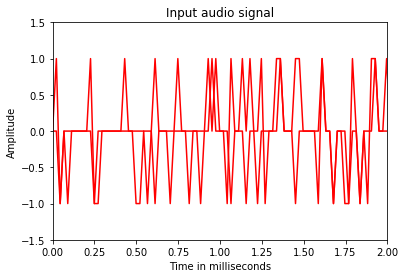

In [13]:
plt.plot(time_axis, audio_signal1, 'r-')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.axis([0, 2, -1.5, 1.5])
plt.title('Input audio signal')
plt.show()

In [23]:
audio_signal = audio_signal / np.power(2, 15)

In [24]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

In [25]:
signal_frequency = np.fft.fft(audio_signal)

In [26]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [27]:
len_fts = len(signal_frequency)

In [28]:
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2

In [29]:
signal_power = 10 * np.log10(signal_frequency)

C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [35]:
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0

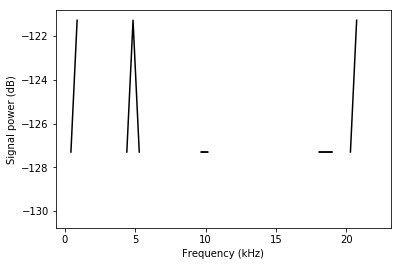

In [36]:
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

In [21]:
from python_speech_features import mfcc, logfbank

In [22]:
features_mfcc = mfcc(audio_signal, frequency_sampling)

In [23]:
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 6
Length of each feature = 13


Text(0.5, 1.05, 'MFCC')

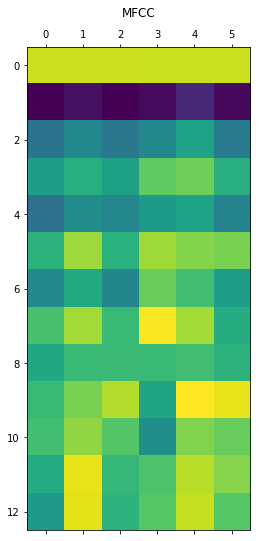

In [24]:
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

In [25]:
filterbank_features = logfbank(audio_signal, frequency_sampling)

In [26]:
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])


Filter bank:
Number of windows = 6
Length of each feature = 26


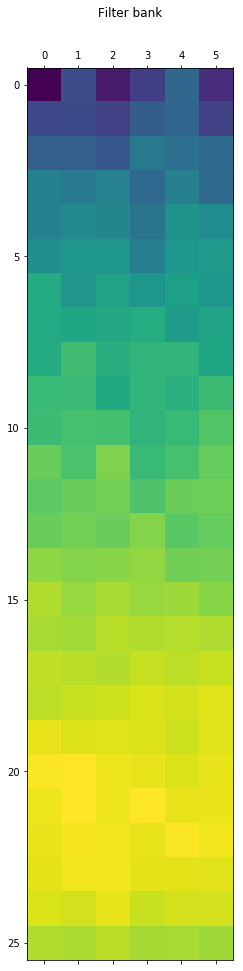

In [27]:
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [38]:
output_file = 'audio_signal_generated.wav'

In [39]:
duration = 4 # in seconds
frequency_sampling = 44100 # in Hz
frequency_tone = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

In [41]:
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

In [44]:
write(output_file, frequency_sampling, audio_signal)

In [46]:
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

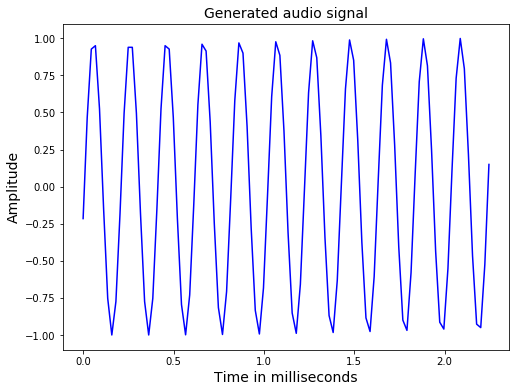

In [49]:
plt.figure(figsize=(8,6))
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Generated audio signal', fontsize=14)
plt.show()